In [23]:
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Use a relative path to the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset')

# Walk through the dataset directory
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago School\078f8f88971426ae729d919ce11e6942.jpg
c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago School\0df505fa53491a9ac49ba2f00de22f2d.jpg
c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago School\1d66809eff05a23dab38d79ec34777fc.jpg
c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago School\20c478f272d5d14015eab8170563a454.jpg
c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago School\3b6b2134568dd116206bf7ff59e7c1bd.jpg
c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago School\4013de6cc22838cd0ab14fd242ecbd84.jpg
c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago School\53b07aa2b907885a963ba95ee2ae1aa7.jpg
c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago School\57a48b2cf75cac21cd042d06257d326f.jpg
c:\Users\Toto\Documents\_PLP\House\House_style_ML\dataset\ML-AR-Chicago 

In [24]:
import python_splitter
# If you want to create only Train-Test Folder(not Validation Folder)
# python_splitter.split_from_folder(r"D:\Real Estate\House_Style_Project\House_style_ML\dataset", train = 0.7, test = 0.3)
# Define the dataset folder relative to the script's current directory
# dataset_dir = os.path.join(os.getcwd(), 'dataset')

# Split the dataset into training and testing sets
# 70% training, 30% testing
python_splitter.split_from_folder(os.path.join(os.getcwd(), 'dataset'), train=0.7, test=0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
target_img_shape = (224,224)
# train_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train'
# val_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\test'
# base_dir = os.path.join(os.getcwd(), 'Train_Test_Folder')

# Define train and validation directories
train_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'train')
val_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'test')

In [27]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_set = train_datagen.flow_from_directory(train_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

# #Augmenting training data with transformations
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=15,      # Randomly rotate images by 20 degrees
#     width_shift_range=0.3,  # Randomly shift images horizontally (15% of the width)
#     height_shift_range=0.3, # Randomly shift images vertically (15% of the height)
#     shear_range=0.9,       # Randomly apply shearing
#     zoom_range=0.1,        # Randomly zoom inside pictures
#     horizontal_flip=True,   # Randomly flip images horizontally
#     fill_mode='nearest'     # Fill pixels when the image is rotated or shifted
# )

# train_set = train_datagen.flow_from_directory(
#     train_dir, 
#     target_size=target_img_shape, 
#     batch_size=32, 
#     class_mode='sparse'
# )

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_set = val_datagen.flow_from_directory(val_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

Found 286 images belonging to 13 classes.
Found 129 images belonging to 13 classes.


In [28]:
print(train_set.class_indices)
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)

    img = image_batch[0] - image_batch[0].min()
    img /= 275.0
    # plt.imshow(img)
    print('class', labels_batch[0])
    break

{'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}
(32, 224, 224, 3)
(32,)
class 8.0


In [29]:
ids, counts = np.unique(train_set.classes, return_counts = True)
print(ids)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[20 20 20 20 26 11 20 20 20 37 20 32 20]


In [30]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>8} = {}'.format(labels[i], counts[i]))

ML-AR-COLONIAL = 20
ML-AR-Chicago School = 20
ML-AR-Classic = 20
ML-AR-MEDITERRANEAN = 20
ML-AR-MID CENTURY = 26
ML-AR-Modern = 11
ML-AR-Modern Minimal = 20
ML-AR-Oriental = 20
ML-AR-SCANDINAVIAN = 20
ML-AR-THAI = 37
ML-AR-TRANSITIONAL = 20
ML-AR-TUDOR HOUSE = 32
ML-AR-VICTORIAN = 20


In [31]:
import keras
from keras import layers
from keras import ops

import os
import numpy as np
from glob import glob
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt

# For data preprocessing
from tensorflow import image as tf_image
from tensorflow import data as tf_data
from tensorflow import io as tf_io

In [32]:
IMAGE_SIZE = 224
BATCH_SIZE = 4
NUM_CLASSES = 13
# DATA_DIR = "./instance-level_human_parsing/instance-level_human_parsing/Training"
# NUM_TRAIN_IMAGES = 1000
# NUM_VAL_IMAGES = 50

# train_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[:NUM_TRAIN_IMAGES]
# train_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[:NUM_TRAIN_IMAGES]
# val_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[
#     NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
# ]
# val_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[
#     NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
# ]


def read_image(image_path, mask=False):
    image = tf_io.read_file(image_path)
    if mask:
        image = tf_image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf_image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf_image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf_image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    return image

# def read_image(image_path, mask=False):
#     # Read the image file
#     image = tf.io.read_file(image_path)
    
#     # Dynamically decode the image
#     image = tf.image.decode_image(image, channels=1 if mask else 3, expand_animations=False)
    
#     # Set the shape for the decoded image
#     image.set_shape([None, None, 1 if mask else 3])
    
#     # Resize the image to target dimensions
#     image = tf.image.resize(image, size=[224, 224])
    
#     return image


def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask


def data_generator(image_list, mask_list):
    dataset = tf_data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf_data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset


train_dataset = train_set
val_dataset = val_set

print("Train Dataset:", train_dataset)
print("Val Dataset:", val_dataset)

Train Dataset: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x000001A2DBFA9AD0>
Val Dataset: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x000001A2EB857350>


# Mask generation process

In [47]:
import os
import numpy as np
import cv2

# Paths
train_dir = "Train_Test_Folder/train"
mask_dir = "Train_Test_Folder/mask"
os.makedirs(mask_dir, exist_ok=True)

# Assign class labels
class_labels = {class_name: idx for idx, class_name in enumerate(sorted(os.listdir(train_dir)))}
print("Class Labels Mapping:", class_labels)

# Fixed image size
image_size = 224

# Generate masks
for class_name, class_idx in class_labels.items():
    class_image_dir = os.path.join(train_dir, class_name)
    class_mask_dir = os.path.join(mask_dir, class_name)
    os.makedirs(class_mask_dir, exist_ok=True)

    for img_name in os.listdir(class_image_dir):
        # Process only image files
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        # Load image
        img_path = os.path.join(class_image_dir, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Skipping invalid image: {img_path}")
            continue

        # Resize image
        img = cv2.resize(img, (image_size, image_size))

        # Generate mask
        mask = np.full((image_size, image_size), class_idx, dtype=np.uint8)

        # Save mask
        mask_save_name = os.path.splitext(img_name)[0] + ".png"
        mask_save_path = os.path.join(class_mask_dir, mask_save_name)
        cv2.imwrite(mask_save_path, mask)
        print(f"Saved mask for {img_name} at {mask_save_path}")


Class Labels Mapping: {'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}
Saved mask for 0393e5ac9134ac35e637785a9bc200b3.jpg at Train_Test_Folder/mask\ML-AR-COLONIAL\0393e5ac9134ac35e637785a9bc200b3.png
Saved mask for 046b8ae53ddcaa1ee95a788450b1751a.jpg at Train_Test_Folder/mask\ML-AR-COLONIAL\046b8ae53ddcaa1ee95a788450b1751a.png
Saved mask for 1c6f1019104d7e4d49bb4254121c8ea1.jpg at Train_Test_Folder/mask\ML-AR-COLONIAL\1c6f1019104d7e4d49bb4254121c8ea1.png
Saved mask for 25953832c9a2997310773c6cc1d30727.jpg at Train_Test_Folder/mask\ML-AR-COLONIAL\25953832c9a2997310773c6cc1d30727.png
Saved mask for 28d3a837843aff8ddead05c52b16b9ea.jpg at Train_Test_Folder/mask\ML-AR-COLONIAL\28d3a837843aff8ddead05c52b16b9ea.png
Saved mask for 290578c8050

Unique values in mask: [6]


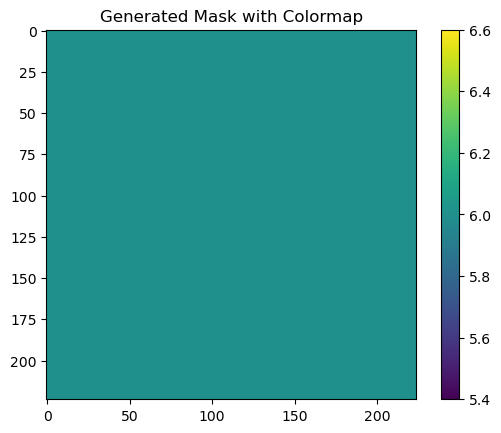

In [43]:
import matplotlib.pyplot as plt
mask = cv2.imread(r"Train_Test_Folder\mask\ML-AR-Modern Minimal\1f951a96283669f2265e2cea304e50de.png", cv2.IMREAD_GRAYSCALE)
print("Unique values in mask:", np.unique(mask))
plt.imshow(mask, cmap="viridis")  # Use a colormap for better distinction
plt.colorbar()
plt.title("Generated Mask with Colormap")
plt.show()

In [40]:
import os
import numpy as np
import cv2
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split

# Load Images and Masks
def load_data(image_dir, mask_dir, img_size):
    images, masks = [], []
    # Traverse subfolders in the image directory
    for class_name in os.listdir(image_dir):
        class_image_dir = os.path.join(image_dir, class_name)
        class_mask_dir = os.path.join(mask_dir, class_name)

        if not os.path.isdir(class_image_dir) or not os.path.isdir(class_mask_dir):
            continue  # Skip if not a directory

        for img_name in os.listdir(class_image_dir):
            # Construct paths
            img_path = os.path.join(class_image_dir, img_name)
            mask_path = os.path.join(class_mask_dir, img_name.replace(".jpg", ".png"))

            # Check if files exist
            if not os.path.exists(img_path):
                print(f"Image file not found: {img_path}")
                continue
            if not os.path.exists(mask_path):
                print(f"Mask file not found: {mask_path}")
                continue

            # Load and resize the image
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)

            # Load and resize the mask
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                print(f"Failed to load mask: {mask_path}")
                continue
            mask = cv2.resize(mask, (img_size, img_size))
            masks.append(mask)

    images = np.array(images) / 255.0  # Normalize images
    masks = np.array(masks)           # Keep masks as integers
    masks = np.expand_dims(masks, axis=-1)  # Add channel dimension
    return images, masks

# Define U-Net model
def unet(input_size=(224, 224, 3), num_classes=13):
    inputs = layers.Input(input_size)

    # Downsample
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Upsample
    u1 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c5)

    return Model(inputs, outputs)

# Paths
train_image_dir = os.path.join(os.getcwd(), 'Train_Test_Folder', 'train')
train_mask_dir = os.path.join(os.getcwd(), 'Train_Test_Folder', 'mask')

# Parameters
img_size = 224
num_classes = 13

# Load data
images, masks = load_data(train_image_dir, train_mask_dir, img_size)

# Check if data is loaded
if len(images) == 0 or len(masks) == 0:
    print("No images or masks loaded. Check your dataset structure and paths.")
else:
    # Split data
    X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

    # Build U-Net model
    model = unet(input_size=(img_size, img_size, 3), num_classes=num_classes)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=16
    )

    # Save the model
    model.save("unet_model.h5")
    print("Model saved as unet_model.h5")


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 349s 23s/step - accuracy: 0.0805 - loss: 2.5734 - val_accuracy: 0.0684 - val_loss: 2.5727
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 368s 25s/step - accuracy: 0.1074 - loss: 2.5432 - val_accuracy: 0.0849 - val_loss: 2.5582
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 349s 23s/step - accuracy: 0.1349 - loss: 2.5330 - val_accuracy: 0.0862 - val_loss: 2.5359
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 398s 24s/step - accuracy: 0.1036 - loss: 2.5125 - val_accuracy: 0.0862 - val_loss: 2.5503
Epoch 5/10
 5/15 ━━━━━━━━━━━━━━━━━━━━ 3:47 23s/step - accuracy: 0.1036 - loss: 2.5434

KeyboardInterrupt: 

In [11]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return ops.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]),
        interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [12]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    preprocessed = keras.applications.resnet50.preprocess_input(model_input)
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=preprocessed
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ add[0][0]         │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c

 Total params: 11,855,437 (45.22 MB)

 Trainable params: 11,822,701 (45.10 MB)

 Non-trainable params: 32,736 (127.88 KB)

In [13]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=["accuracy"],
)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=25)

plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.ylabel("val_accuracy")
plt.xlabel("epoch")
plt.show()

c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 224, 224, 13)